## FIONA HARIA  D1-1   60009220048   D040
## TOPIC: Football player price prediction using Machine Learning

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading the Dataset

In [2]:
df = pd.read_csv("fifaindex_21.csv")

# Understanding the Dataset

In [3]:
df.head(5)

,Name,Age,Value €,Value $,Value £,Wage €,Wage $,Wage £,Ball Control,Dribbling,...,Long Shots,Curve,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes
0,Manuel Neuer,35,20500000.0,23000000.0,18500000.0,135000.0,150000.0,120000.0,46,30,...,16,14,11,47,11,88,88,88,91,89
1,Lionel Messi,33,103500000.0,117000000.0,93000000.0,560000.0,630000.0,500000.0,96,96,...,94,93,94,75,88,14,6,11,15,8
2,Jan Oblak,28,120000000.0,135500000.0,108000000.0,125000.0,140000.0,110000.0,30,12,...,12,13,14,11,13,90,87,92,78,90
3,Kalidou Koulibaly,29,76500000.0,86500000.0,69000000.0,140000.0,155000.0,125000.0,74,69,...,15,28,28,33,14,13,7,11,7,5
4,N'Golo Kanté,30,78000000.0,88000000.0,70000000.0,190000.0,215000.0,170000.0,80,79,...,65,49,49,54,56,7,15,12,10,10


In [4]:
df.shape

(18000, 42)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            18000 non-null  object 
 1   Age             18000 non-null  int64  
 2   Value €         17752 non-null  float64
 3   Value $         17752 non-null  float64
 4   Value £         17752 non-null  float64
 5   Wage €          17752 non-null  float64
 6   Wage $          17752 non-null  float64
 7   Wage £          17752 non-null  float64
 8   Ball Control    18000 non-null  int64  
 9   Dribbling       18000 non-null  int64  
 10  Marking         18000 non-null  int64  
 11  Slide Tackle    18000 non-null  int64  
 12  Stand Tackle    18000 non-null  int64  
 13  Aggression      18000 non-null  int64  
 14  Reactions       18000 non-null  int64  
 15  Att. Position   18000 non-null  int64  
 16  Interceptions   18000 non-null  int64  
 17  Vision          18000 non-null 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,18000.0,2.592617e+01,4.670134e+00,17.0,22.0,25.0,29.0,54.0
Value €,17752.0,3.051957e+06,7.805119e+06,1000.0,550000.0,1100000.0,2200000.0,185500000.0
Value $,17752.0,3.445901e+06,8.815038e+06,1000.0,625000.0,1300000.0,2500000.0,209500000.0
Value £,17752.0,2.745018e+06,7.020546e+06,900.0,500000.0,1000000.0,2000000.0,167000000.0
Wage €,17752.0,9.928453e+03,1.966201e+04,1500.0,1800.0,3700.0,9700.0,560000.0
Wage $,17752.0,1.116957e+04,2.216151e+04,1600.0,2000.0,4100.0,11000.0,630000.0
Wage £,17752.0,8.909469e+03,1.766127e+04,1300.0,1600.0,3300.0,8700.0,500000.0
Ball Control,18000.0,5.970844e+01,1.607416e+01,5.0,57.0,64.0,69.0,96.0
Dribbling,18000.0,5.679300e+01,1.838916e+01,4.0,52.0,62.0,68.0,96.0
Marking,18000.0,4.764389e+01,2.010519e+01,3.0,30.0,54.0,64.0,93.0


# Handling Missing Values

In [7]:
df.isnull().sum()

Name                0
Age                 0
Value €           248
Value $           248
Value £           248
Wage €            248
Wage $            248
Wage £            248
Ball Control        0
Dribbling           0
Marking             0
Slide Tackle        0
Stand Tackle        0
Aggression          0
Reactions           0
Att. Position       0
Interceptions       0
Vision              0
Composure           0
Crossing            0
Short Pass          0
Long pass           0
Acceleration        0
Stamina             0
Strength            0
Balance             0
Sprint Speed        0
Agility             0
Jumping             0
Heading             0
Shot Power          0
Finishing           0
Long Shots          0
Curve               0
FK Acc.             0
Penalties           0
Volleys             0
GK Positioning      0
GK Diving           0
GK Handling         0
GK Kicking          0
GK Reflexes         0
dtype: int64

### Since only 1.4% of the data has missing values, we will drop the missing values from the dataset

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Name              0
Age               0
Value €           0
Value $           0
Value £           0
Wage €            0
Wage $            0
Wage £            0
Ball Control      0
Dribbling         0
Marking           0
Slide Tackle      0
Stand Tackle      0
Aggression        0
Reactions         0
Att. Position     0
Interceptions     0
Vision            0
Composure         0
Crossing          0
Short Pass        0
Long pass         0
Acceleration      0
Stamina           0
Strength          0
Balance           0
Sprint Speed      0
Agility           0
Jumping           0
Heading           0
Shot Power        0
Finishing         0
Long Shots        0
Curve             0
FK Acc.           0
Penalties         0
Volleys           0
GK Positioning    0
GK Diving         0
GK Handling       0
GK Kicking        0
GK Reflexes       0
dtype: int64

# Exploratory Data Analysis

In [10]:
df.columns

Index(['Name', 'Age', 'Value €', 'Value $', 'Value £', 'Wage €', 'Wage $',
       'Wage £', 'Ball Control', 'Dribbling', 'Marking', 'Slide Tackle',
       'Stand Tackle', 'Aggression', 'Reactions', 'Att. Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short Pass',
       'Long pass', 'Acceleration', 'Stamina', 'Strength', 'Balance',
       'Sprint Speed', 'Agility', 'Jumping', 'Heading', 'Shot Power',
       'Finishing', 'Long Shots', 'Curve', 'FK Acc.', 'Penalties', 'Volleys',
       'GK Positioning', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Reflexes'],
      dtype='object')

### To undestand which in-game attributes contribute most to a player's overall value, a correlation matrix against the Value column has been created

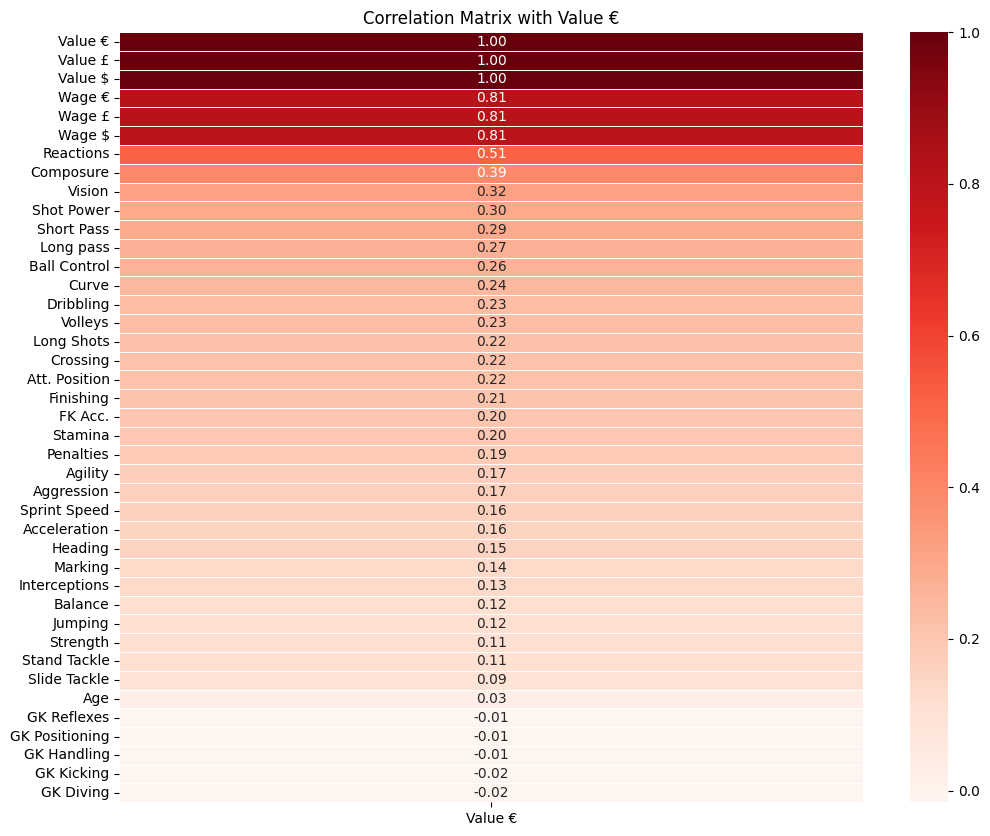

In [11]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Extract correlations with 'Value €' column
value_correlation = correlation_matrix['Value €'].sort_values(ascending=False)

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(value_correlation.to_frame(), cmap='Reds', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix with Value €')
plt.show()

### Conclusions:

- Players with higher values tend to have higher wage
- Players with higher values tend to have better stats in the areas of Reactions, Composure, Vision, Short Pass, Shot Power, Long Pass
- Players with higher values tend to have lower ratings for goalkeeping stats

## Creating Age Class 

- If the age of the player is less than 21, Encoder = 0
- If the age of the player is between 21 and 25, Encoder = 1
- If the age of the player is between 25 and 30, Encoder = 2
- If the age of the player is more than 30, Encoder = 3


In [12]:
df['class_age'] = df['Age'].apply(lambda x : 0 if x <=21 else( 1 if x <=25 else (2 if x<=30 else 3 )))

### Percentage Distribution of Players Across Age Groups

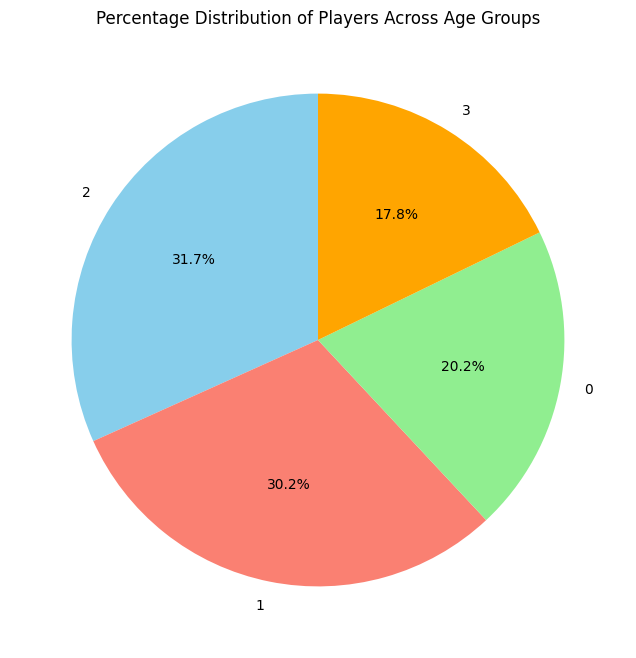

In [13]:
plt.figure(figsize=(8, 8))
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']
df['class_age'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90,colors=colors)
plt.title('Percentage Distribution of Players Across Age Groups')
plt.ylabel('')
plt.show()

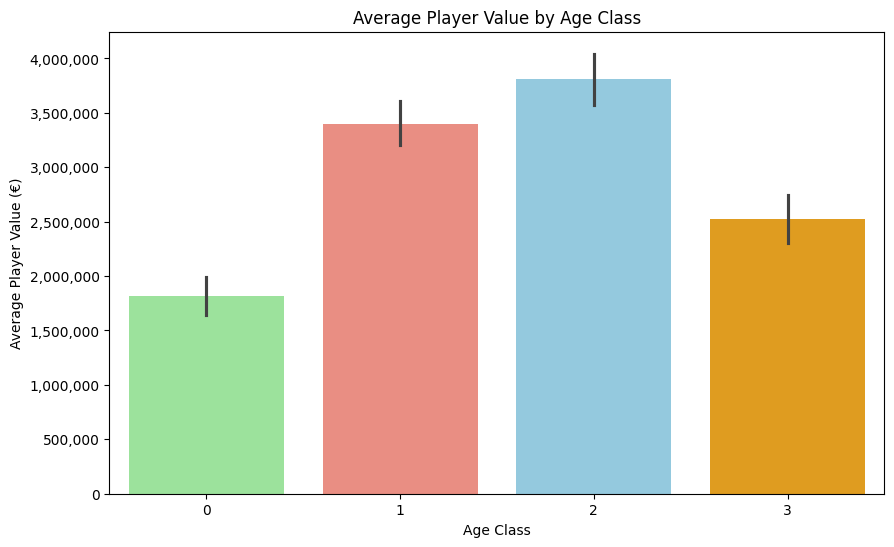

In [14]:
import matplotlib.ticker as ticker
colors = ['lightgreen', 'salmon', 'skyblue', 'orange']
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='class_age', y='Value €', data=df, estimator=np.mean, palette=colors)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Average Player Value by Age Class')
plt.xlabel('Age Class')
plt.ylabel('Average Player Value (€)')
plt.show()

### Conclusion:
 - There is a significant increase in value from the Class 0 to Class 1. This suggests that younger players are steadily increasing in value as their skills develop and they gain experience.
 - Between the age of 25-30, often considered as a prime of a player's career, is when they have reached their peak athletic ability and skill level

## Creating Player Rating Class

- If the player has 5 times more than 90 rating : he is a world class player. Encoder = 5
- If he has 5 times more than 85 rating : he is a very good player. Encoder = 4
- If he has 5 times more than 80 rating : he is a good player. Encoder = 3
- If he has 5 times more than 75 rating : he is a normal player. Encoder = 2
- If he has 5 times more than 70 rating : he is a basic player. Encoder = 1
- If he has 5 times more than 60 rating : he is a district player. Encoder = 0

In [15]:
def count_values_in_row(df,rating):
    return (df.iloc[:,8:] > rating).sum(axis=1)>=5

In [16]:
df.loc[count_values_in_row(df,0),'class_player'] = 0
df.loc[count_values_in_row(df,70),'class_player'] = 1
df.loc[count_values_in_row(df,75),'class_player'] = 2
df.loc[count_values_in_row(df,80),'class_player'] = 3
df.loc[count_values_in_row(df,85),'class_player'] = 4
df.loc[count_values_in_row(df,90),'class_player'] = 5

In [17]:
df[['Name','class_player']].head(10)

,Name,class_player
0,Manuel Neuer,4.0
1,Lionel Messi,5.0
2,Jan Oblak,4.0
3,Kalidou Koulibaly,4.0
4,N'Golo Kanté,4.0
5,Alisson,4.0
6,Toni Kroos,4.0
7,Erling Haaland,4.0
8,Keylor Navas,3.0
9,Bruno Fernandes,5.0


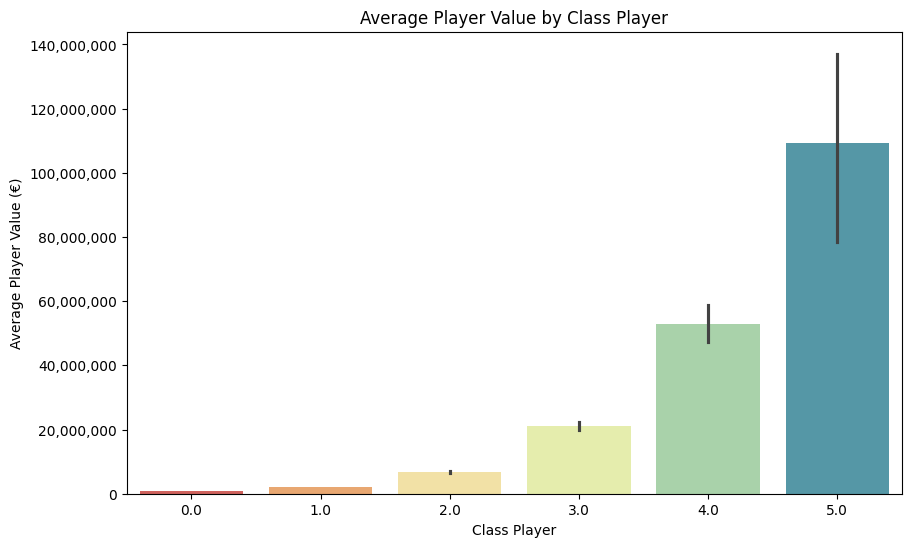

In [18]:
import matplotlib.ticker as ticker
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='class_player', y='Value €', data=df, estimator=np.mean, palette="Spectral")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Average Player Value by Class Player')
plt.xlabel('Class Player')
plt.ylabel('Average Player Value (€)')
plt.show()

# Plotting the top three correlated attributes against Age

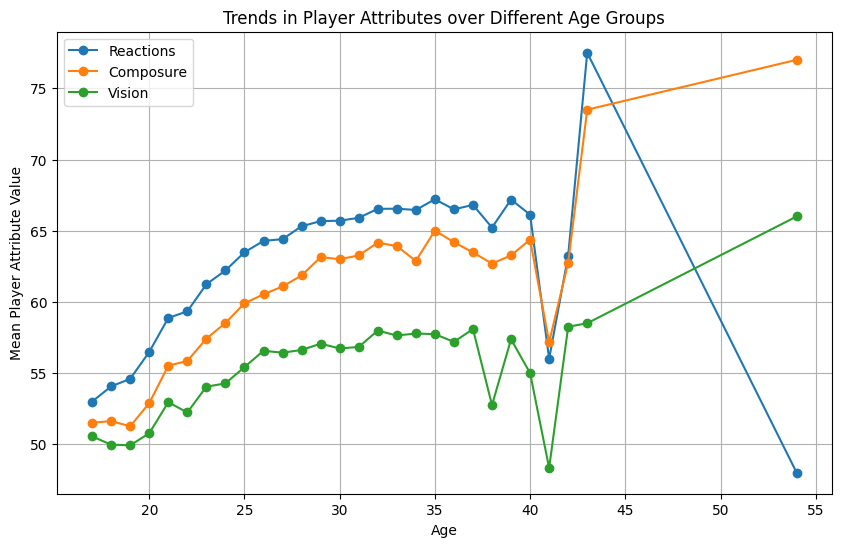

In [19]:
attributes = ['Reactions', 'Composure', 'Vision'] 

grouped_by_age = df.groupby('Age')[attributes].mean()

# Plotting
plt.figure(figsize=(10, 6))

for attribute in attributes:
    plt.plot(grouped_by_age.index, grouped_by_age[attribute], marker='o', label=attribute)

plt.xlabel('Age')
plt.ylabel('Mean Player Attribute Value')
plt.title('Trends in Player Attributes over Different Age Groups')
plt.legend()
plt.grid(True)
plt.show()

- The difference in reaction score descreases significantly the age of 40 
- Composure appears to increase with age. This could be because older players have more experience dealing with pressure situations

In [20]:
topplayers = df.nlargest(5,'Value €')
topplayers

,Name,Age,Value €,Value $,Value £,Wage €,Wage $,Wage £,Ball Control,Dribbling,...,FK Acc.,Penalties,Volleys,GK Positioning,GK Diving,GK Handling,GK Kicking,GK Reflexes,class_age,class_player
26,Kylian Mbappé,22,185500000.0,209500000.0,167000000.0,160000.0,180000.0,145000.0,90,92,...,63,80,83,11,13,5,7,6,1,5.0
17,Neymar Jr,29,132000000.0,149500000.0,119000000.0,270000.0,310000.0,245000.0,95,95,...,89,92,87,15,9,9,15,11,2,5.0
29,Kevin De Bruyne,29,127500000.0,144000000.0,114500000.0,370000.0,410000.0,330000.0,92,88,...,83,83,82,10,15,13,5,13,2,5.0
15,Robert Lewandowski,32,124500000.0,140500000.0,112000000.0,270000.0,310000.0,245000.0,88,85,...,85,90,89,8,15,6,12,10,3,4.0
12,Harry Kane,27,123000000.0,138500000.0,110500000.0,225000.0,250000.0,200000.0,85,81,...,68,91,85,14,8,10,11,11,2,5.0


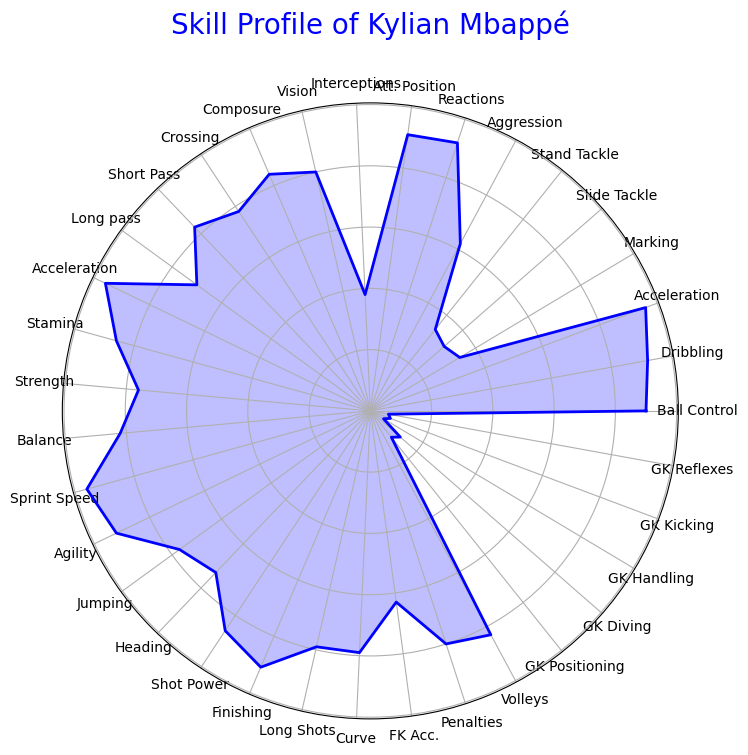

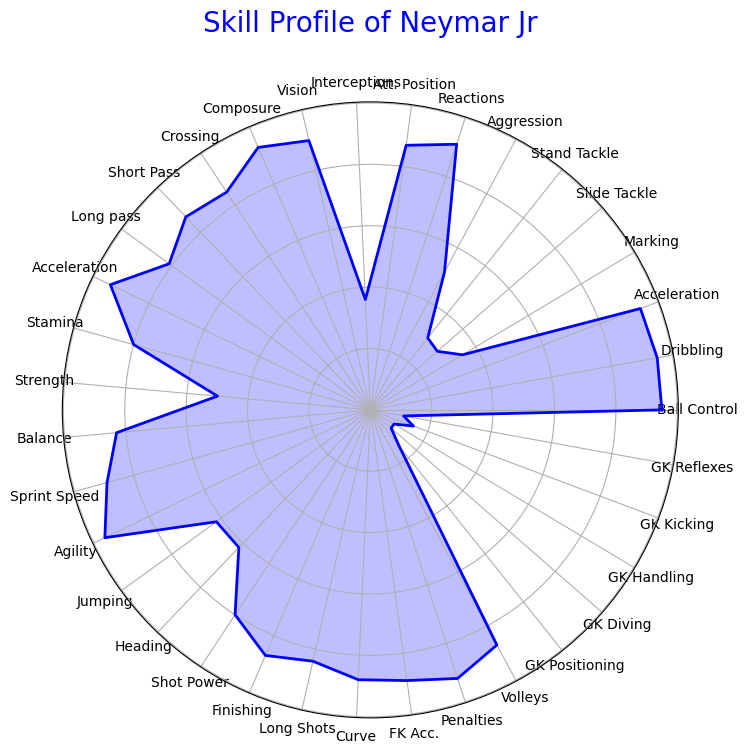

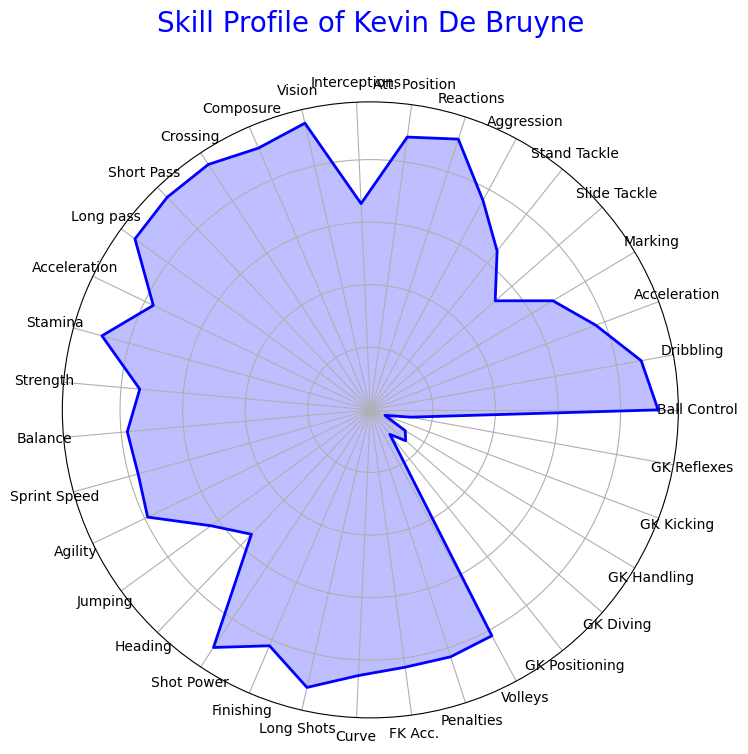

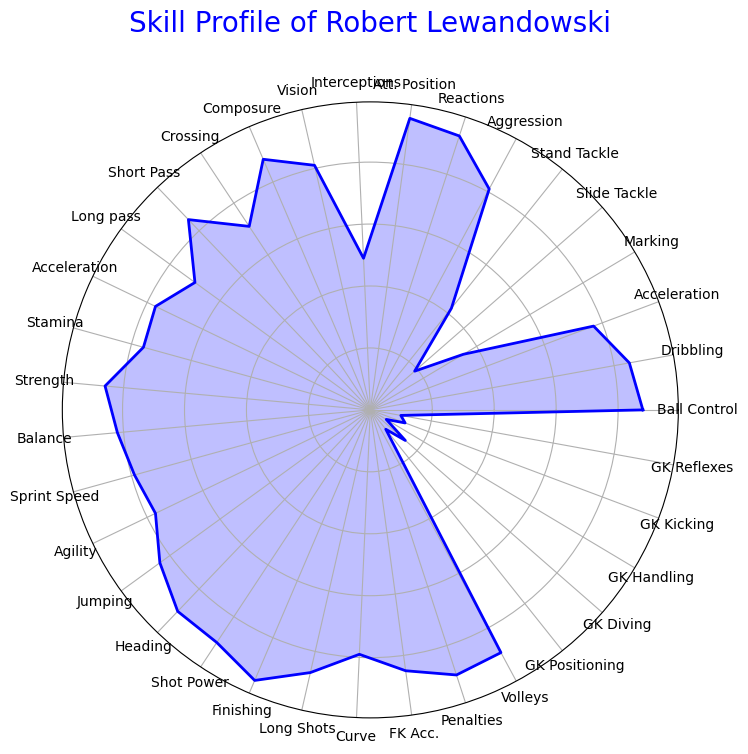

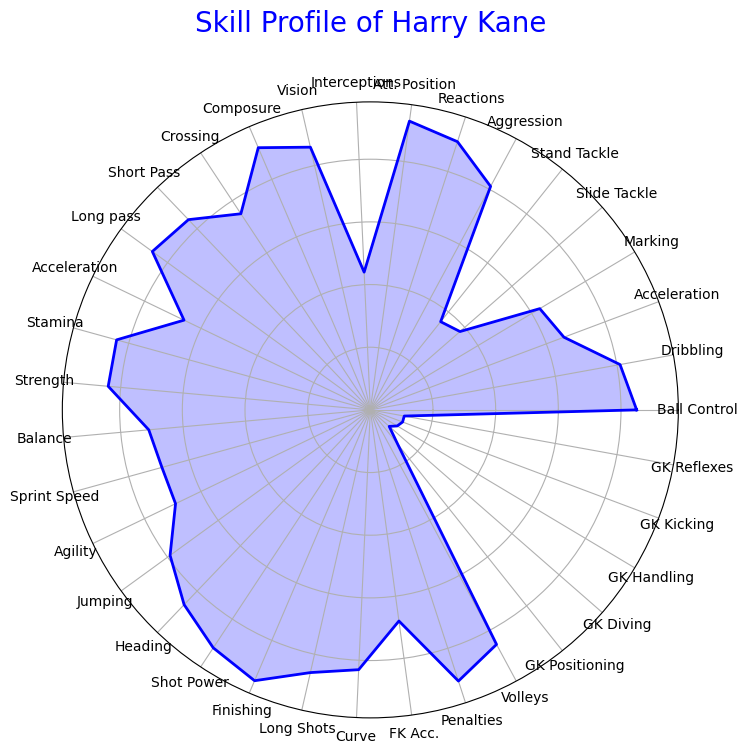

In [21]:
attributes = ['Ball Control', 'Dribbling', 'Acceleration', 'Marking', 'Slide Tackle',
              'Stand Tackle', 'Aggression', 'Reactions', 'Att. Position', 'Interceptions',
              'Vision', 'Composure', 'Crossing', 'Short Pass', 'Long pass', 'Acceleration',
              'Stamina', 'Strength', 'Balance', 'Sprint Speed', 'Agility', 'Jumping',
              'Heading', 'Shot Power', 'Finishing', 'Long Shots', 'Curve', 'FK Acc.',
              'Penalties', 'Volleys', 'GK Positioning', 'GK Diving', 'GK Handling',
              'GK Kicking', 'GK Reflexes']

attributes_data = topplayers[attributes]
def plot_radar_chart(player_data, player_name):
    # Define the number of attributes
    num_attributes = len(attributes)
    
    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_attributes, endpoint=False).tolist()
    
    # The plot is circular, so we need to "complete the loop"
    values = player_data[attributes].values.flatten().tolist()
    values += values[:1]
    angles += angles[:1]
    
    # Plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)
    
    # Add labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes)
    
    # Title
    ax.set_title(f'Skill Profile of {player_name}', size=20, color='blue', y=1.1)
    plt.show()

# Plot radar chart for each player
for index, row in topplayers.iterrows():
    plot_radar_chart(row, row['Name'])

## Conclusion:
- Certain players demonstarte exceptional proficiency in specific attributes like Kylian Mbappe in Acceralation and Sprint Speed, Neymar in Ball Control and Penalties, Kevin in Long Pass and Harry in Finishing
- Radar charts aid in feature selection that differentiate high-value players from others.
- By comparing a player's radar chart with those of other players in similar positions or playing styles, we can assess their relative market value.